# Home Loan Default - Risk Management

### Problem Statement
* Prepare a complete data analysis report on the given data.
* Create a predictive model  to  identify the factors / customer segments that are eligible for taking loan.

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Loading Datasets 

In [2]:
data                  = pd.read_csv("application_train.csv")
bureau                = pd.read_csv("bureau.csv")
bureau_balance        = pd.read_csv("bureau_balance.csv")
credit_card_balance   = pd.read_csv("credit_card_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")
pos_cash_balance      = pd.read_csv("POS_CASH_balance.csv")
previous_application  = pd.read_csv("previous_application.csv")

### Exploring Data 

In [3]:
print ("application_train     :",data.shape)
print ("bureau                :",bureau.shape)
print ("bureau_balance        :",bureau_balance.shape)
print ("credit_card_balance   :",credit_card_balance.shape)
print ("installments_payments :",installments_payments.shape)
print ("pos_cash_balance      :",pos_cash_balance.shape)
print ("previous_application  :",previous_application.shape)

application_train     : (307511, 122)
bureau                : (1716428, 17)
bureau_balance        : (27299925, 3)
credit_card_balance   : (3840312, 23)
installments_payments : (13605401, 8)
pos_cash_balance      : (10001358, 8)
previous_application  : (1670214, 37)


In [4]:
datasets = {
    "application_train": data,
    "bureau": bureau,
    "bureau_balance": bureau_balance,
    "credit_card_balance": credit_card_balance,
    "installments_payments": installments_payments,
    "pos_cash_balance": pos_cash_balance,
    "previous_application": previous_application
}

for name, df in datasets.items():
    print(f"{name:}: {df.shape}")


application_train: (307511, 122)
bureau: (1716428, 17)
bureau_balance: (27299925, 3)
credit_card_balance: (3840312, 23)
installments_payments: (13605401, 8)
pos_cash_balance: (10001358, 8)
previous_application: (1670214, 37)


In [5]:
for name, df in datasets.items():
    print(name.upper())
    display(df.head(5))


APPLICATION_TRAIN


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


BUREAU


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


BUREAU_BALANCE


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


CREDIT_CARD_BALANCE


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


INSTALLMENTS_PAYMENTS


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


POS_CASH_BALANCE


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


PREVIOUS_APPLICATION


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Observations
* The dataset collection consists of multiple related tables, each providing different types of information about loan applicants and their financial behavior.
* The output of the dataset shape inspection code reveals the following structure:

| Dataset Name              | Rows       | Columns | Description                                                                                                                                                  |
| ------------------------- | ---------- | ------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **application_train**     | 307,511    | 122     | Main dataset containing applicant information and target variable (`TARGET`: 1 = Defaulter, 0 = Non-defaulter). Each record represents one loan application. |
| **bureau**                | 1,717,428  | 17      | Contains information about previous credits of clients taken from other financial institutions. Multiple records may exist for each applicant.               |
| **bureau_balance**        | 27,299,925 | 3       | Provides monthly balance data for each credit record in the Bureau dataset, offering detailed time-series information.                                       |
| **previous_application**  | 1,670,214  | 37      | Records all previous loan applications made by clients before the current one.                                                                               |
| **POS_CASH_balance**      | 10,001,358 | 8       | Contains monthly balance details for previous Point-of-Sale (POS) and cash loans.                                                                            |
| **credit_card_balance**   | 3,840,312  | 23      | Tracks monthly credit card balance information for applicants.                                                                                               |
| **installments_payments** | 13,605,401 | 8       | Contains historical payment data for installments of previous loans.    

* `application_train` is applicant-level (one record per loan).
* Other datasets such as `bureau`, `previous_application`, and balance datasets contain multiple records per applicant, representing time-series or transactional information.
* Datasets like `bureau_balance`, `POS_CASH_balance`, and `installments_payments` have millions of rows.
* **Relationship Mapping**
   * The common key across datasets is `SK_ID_CURR`.
   * Other relationship keys include `SK_ID_BUREAU` (linking `bureau` and `bureau_balance`) and `SK_ID_PREV` (linking `previous_application` with other balance datasets).
   * Proper joining and aggregation strategies are essential to prevent data duplication and maintain referential integrity.

In [6]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
data.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [9]:
data.nunique().sort_values(ascending=False).head(15)

SK_ID_CURR           307511
EXT_SOURCE_2         119831
EXT_SOURCE_1         114584
DAYS_BIRTH            17460
DAYS_REGISTRATION     15688
AMT_ANNUITY           13672
DAYS_EMPLOYED         12574
DAYS_ID_PUBLISH        6168
AMT_CREDIT             5603
LIVINGAREA_MODE        5301
LIVINGAREA_MEDI        5281
LIVINGAREA_AVG         5199
TOTALAREA_MODE         5116
BASEMENTAREA_MODE      3841
BASEMENTAREA_AVG       3780
dtype: int64

Observations
* The "application_train" dataset contains 307,511 records and 122 columns.
* The features are a mix of numerical and categorical variables, including demographic information, financial attributes
* Target variable TARGET indicating loan default status. 
* Preliminary inspection shows the presence of missing values and varying data types, suggesting the need for cleaning and preprocessing before modeling.

In [10]:
pd.set_option('display.max_rows', None)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


Observations
* The descriptive statistics indicate that the dataset contains a rich variety of numerical features, but also includes outliers, missing values, and special placeholders that require careful preprocessing.
* The class imbalance in the target variable suggests that resampling or weighted modeling techniques may be necessary for reliable prediction.

### Exploratory Data Analysis

#### Checking data imbalance

In [11]:
target = data['TARGET'].value_counts()
target_percent = 100 * data['TARGET'].value_counts()/ len(data['TARGET'])

target_table = pd.DataFrame({
    'Target Values': target,
    'Target %': target_percent, 
})

target_table 

,Target Values,Target %
TARGET,,
0,282686,91.927118
1,24825,8.072882


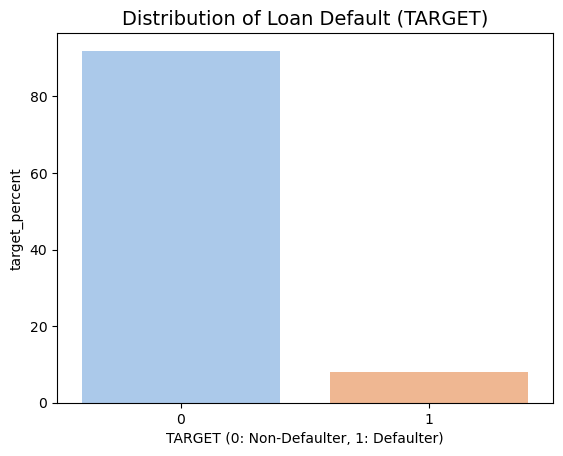

In [12]:
sns.barplot(target_percent, palette='pastel')
plt.title('Distribution of Loan Default (TARGET)', fontsize=14)
plt.xlabel('TARGET (0: Non-Defaulter, 1: Defaulter)')
plt.ylabel('target_percent')
plt.show()

Observations
* approximately **91.9% of applicants are non-defaulters** (TARGET = 0), while only **8.1% are defaulters** (TARGET = 1).
* This shows a highly **imbalanced dataset**, meaning that the model could easily predict most loans as “non-default” and still achieve high accuracy, but **perform poorly in identifying true defaulters**.
* To address this, techniques such as **SMOTE (Synthetic Minority Oversampling Technique**, **undersampling**, or **class-weight adjustments** can be applied during model training to ensure balanced learning and fair model performance across both classes.

#### Checking missing data

In [13]:
for name, df in datasets.items():
    print(f"\nDataset: {name}")
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_data = pd.DataFrame({'Missing Values': missing, 'Missing %': missing_percent})
    missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Missing %', ascending=False)
   
    print(missing_data.head(15))  # show top 15 missing columns
    print("-" * 60)


Dataset: application_train
                          Missing Values  Missing %
COMMONAREA_MEDI                   214865  69.872297
COMMONAREA_AVG                    214865  69.872297
COMMONAREA_MODE                   214865  69.872297
NONLIVINGAPARTMENTS_MEDI          213514  69.432963
NONLIVINGAPARTMENTS_MODE          213514  69.432963
NONLIVINGAPARTMENTS_AVG           213514  69.432963
FONDKAPREMONT_MODE                210295  68.386172
LIVINGAPARTMENTS_MODE             210199  68.354953
LIVINGAPARTMENTS_MEDI             210199  68.354953
LIVINGAPARTMENTS_AVG              210199  68.354953
FLOORSMIN_MODE                    208642  67.848630
FLOORSMIN_MEDI                    208642  67.848630
FLOORSMIN_AVG                     208642  67.848630
YEARS_BUILD_MODE                  204488  66.497784
YEARS_BUILD_MEDI                  204488  66.497784
------------------------------------------------------------

Dataset: bureau
                        Missing Values  Missing %
AMT_ANNUITY 

Observations
* Several columns in "application_train dataset" contain substantial proportions of missing data.
    * For instance, features such as `COMMONAREA_AVG` and `LANDAREA_AVG` have over 50% missing values, which may require either removal or advanced imputation.
* Supporting datasets such as **""bureau_balance"**, **"pos_cash_balance"** and **"installments_payments"** contain minimal missing values, making them reliable for feature extraction.
* Features with very high missing percentages (>40%) may need to be dropped or imputed carefully, depending on their importance.
* For moderately missing columns (5–40%), appropriate imputation strategies (mean, median, or model-based imputation) can be applied.

#### Distribution of Applicant Income

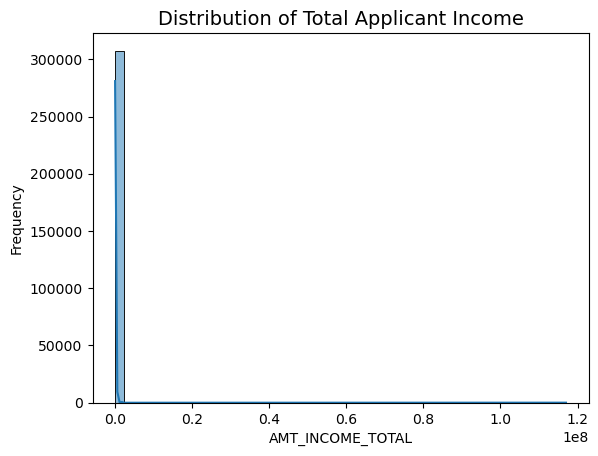

In [14]:
sns.histplot(data['AMT_INCOME_TOTAL'], bins=50, kde=True)
plt.title('Distribution of Total Applicant Income', fontsize=14)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.show()

Observations
* Most applicants have incomes concentrated at the lower end of the scale (close to 0).
* A few applicants have extremely high incomes, causing a long tail on the right
* The x-axis extends up to around 1.2×10⁸, suggesting there are a few extremely large outliers, which are making it hard to see the main data pattern clearly.

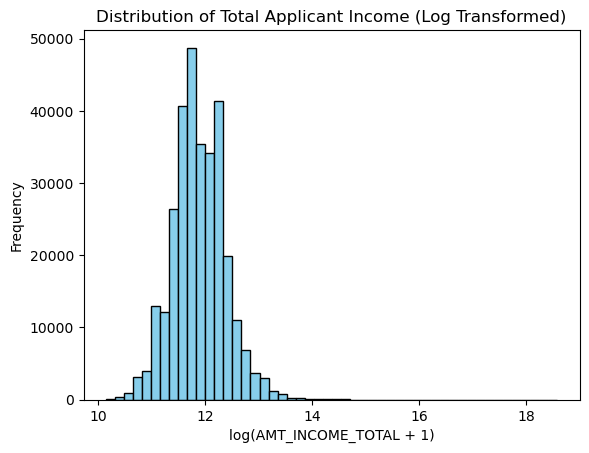

In [15]:
plt.hist(np.log1p(data['AMT_INCOME_TOTAL']), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Applicant Income (Log Transformed)')
plt.xlabel('log(AMT_INCOME_TOTAL + 1)')
plt.ylabel('Frequency')
plt.show()

Log transformed graph helps in understanding the differences between low and middle-income groups.

#### Loan Amount Distribution

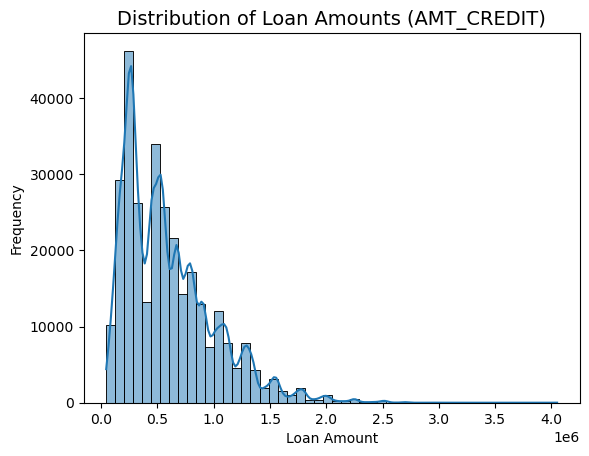

In [16]:
sns.histplot(data['AMT_CREDIT'], bins=50, kde=True)
plt.title('Distribution of Loan Amounts (AMT_CREDIT)', fontsize=14)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

Observations
* Most loans are concentrated in the lower amount range, while very few applicants requested high-value loans.
* The distribution again shows right-skewness, indicating potential need for normalization.

#### Age Distribution

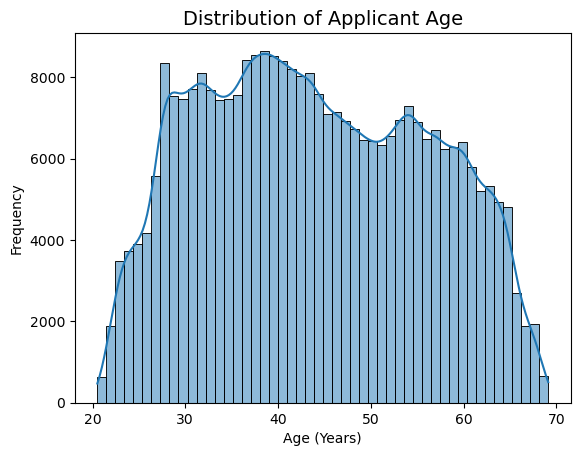

In [17]:
data['AGE'] = abs(data['DAYS_BIRTH']) / 365

sns.histplot(data['AGE'], bins=50, kde=True)
plt.title('Distribution of Applicant Age', fontsize=14)
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.savefig("Distribution of Applicant Age.png")
plt.show()

Observations
* The majority of applicants are between 25 and 45 years old, with a steady decline toward older age groups.
* Very few applicants are above 60.
* Younger applicants may represent higher loan activity.

#### Gender Distribution

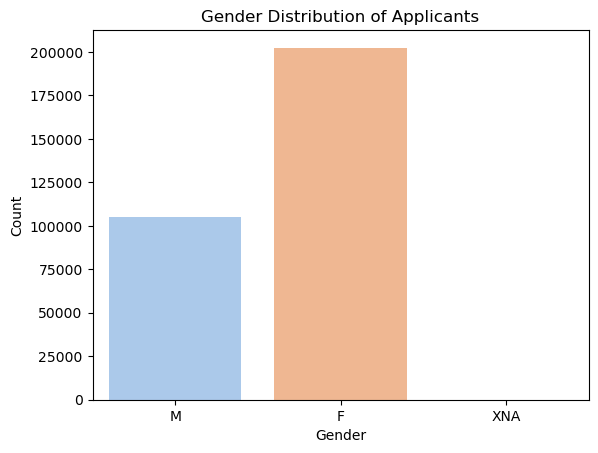

In [18]:
sns.countplot(x='CODE_GENDER', data=data, palette='pastel')
plt.title('Gender Distribution of Applicants')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig("Gender Distribution of Applicants.png")
plt.show()

Observations
* The dataset is slightly dominated by female applicants.

#### Education Type

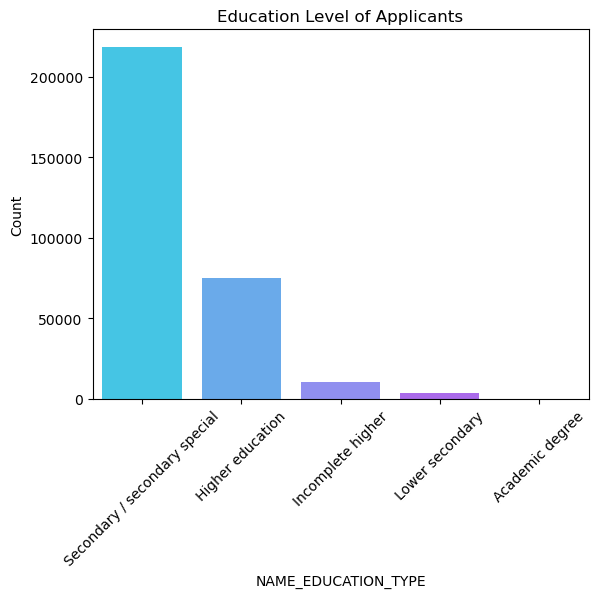

In [19]:
sns.countplot(x='NAME_EDUCATION_TYPE', data=data, order=data['NAME_EDUCATION_TYPE'].value_counts().index, palette='cool')
plt.title('Education Level of Applicants')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

Observations
* Most applicants have secondary or higher education. Very few have academic degrees. 
* Education level might correlate with income stability and loan repayment behaviour

#### Housing Type

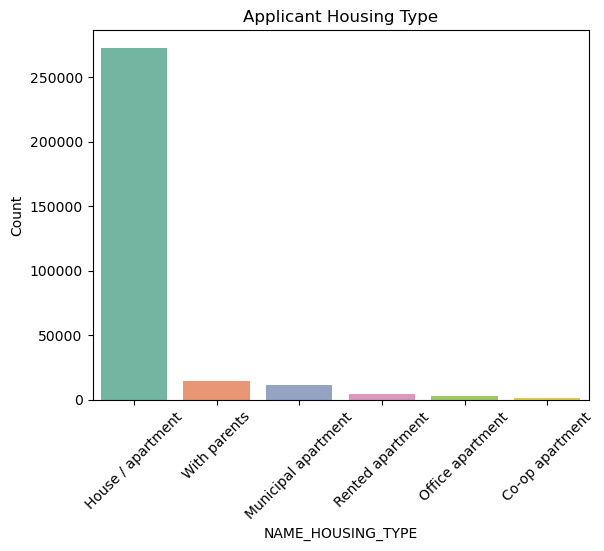

In [20]:
sns.countplot(x='NAME_HOUSING_TYPE', data=data, order=data['NAME_HOUSING_TYPE'].value_counts().index, palette='Set2')
plt.title('Applicant Housing Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

Observations
* The majority of applicants live in their own houses and some with their parents.
* Applicants who rent may represent higher risk, potentially due to lower financial stability.

#### Income vs Default

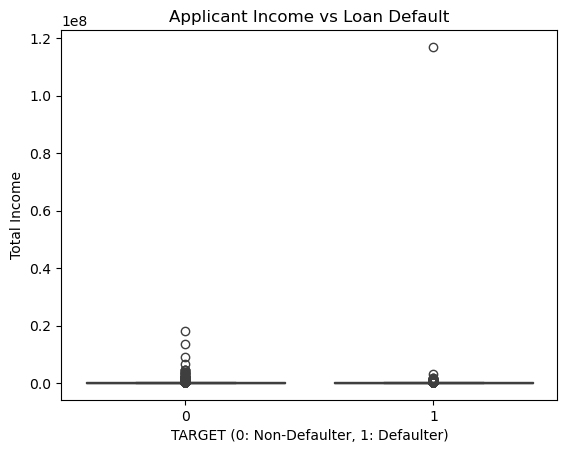

In [21]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=data)
plt.title('Applicant Income vs Loan Default')
plt.xlabel('TARGET (0: Non-Defaulter, 1: Defaulter)')
plt.ylabel('Total Income')
plt.show()

Observations
* extreme values stretch the y-axis and compress most other data points near zero
* The median appears almost the same for defaulters and non-defaulters -This implies income alone may not be a strong distinguishing factor for predicting default.
* Due to high skewness and extreme outliers, a log transformation of income would make patterns clearer.

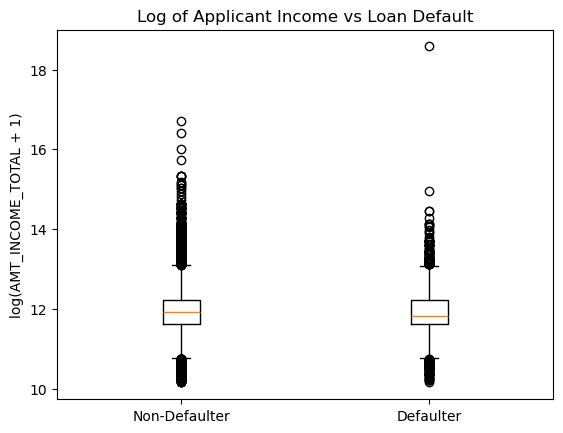

In [22]:
plt.boxplot([np.log1p(data[data['TARGET']==0]['AMT_INCOME_TOTAL']),
             np.log1p(data[data['TARGET']==1]['AMT_INCOME_TOTAL'])])
plt.xticks([1, 2], ['Non-Defaulter', 'Defaulter'])
plt.title('Log of Applicant Income vs Loan Default')
plt.ylabel('log(AMT_INCOME_TOTAL + 1)')
plt.show()

observations
* After log transformation, both groups’ distributions appear more balanced and compact.
* Reduced Effect of Outliers, making the comparison between groups meaningful
* Median log income nearly the same for both - This suggests total income does not strongly differentiate defaulters from non-defaulters.
* Total income alone doesn’t appear to significantly affect default behavior, indicating other factors likely drive default risk.

In [23]:
# Create a new column for log-transformed income
data['LOG_AMT_INCOME_TOTAL'] = np.log1p(data['AMT_INCOME_TOTAL'])

# Group by TARGET and calculate summary statistics
summary = data.groupby('TARGET')['LOG_AMT_INCOME_TOTAL'].agg(
    Mean='mean',
    Median='median',
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75)
)

# Calculate IQR
summary['IQR'] = summary['Q3'] - summary['Q1']

print(summary)


             Mean     Median         Q1       Q3       IQR
TARGET                                                    
0       11.911923  11.908347  11.630717  12.2185  0.587783
1       11.878753  11.813037  11.630717  12.2185  0.587783


Observations
* Mean and median values for both classes are almost the same. This confirms no major income difference between defaulters and non-defaulters.
* IQR (interquartile range) is nearly identical for both, meaning income variation within each group is similar

#### Credit Amount vs Default

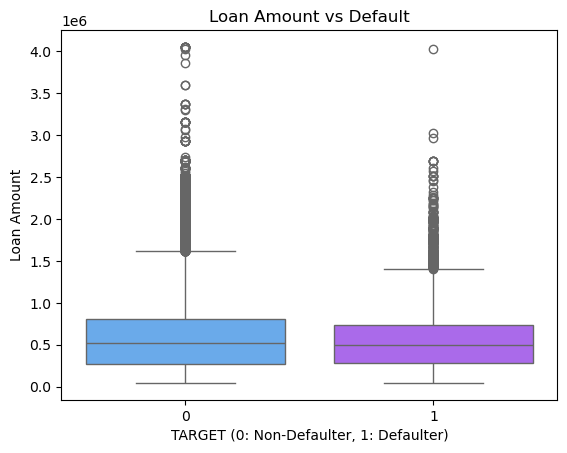

In [24]:
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=data, palette='cool')
plt.title('Loan Amount vs Default')
plt.xlabel('TARGET (0: Non-Defaulter, 1: Defaulter)')
plt.ylabel('Loan Amount')
plt.savefig('Loan Amount vs Default.png')
plt.show()

In [25]:
# Group by TARGET and calculate statistics for loan amount 
loan_summary = data.groupby('TARGET')['AMT_CREDIT'].agg(
    Mean='mean',
    Median='median',
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75)
)

# Add IQR (Interquartile Range)
loan_summary['IQR'] = loan_summary['Q3'] - loan_summary['Q1']

print(loan_summary)


                 Mean    Median        Q1        Q3       IQR
TARGET                                                       
0       602648.282002  517788.0  270000.0  810000.0  540000.0
1       557778.527674  497520.0  284400.0  733315.5  448915.5


Observations
* Mean loan amount for defaulters is a bit lower than for non-defaulters.
* Similarly, the median shows that defaulters generally took smaller loans on average.
* The interquartile range (IQR) for both groups is close - This means both groups have similar variability in loan amounts.
* Loan amount alone doesn’t strongly differentiate defaulters from non-defaulters.

#### Age vs Default

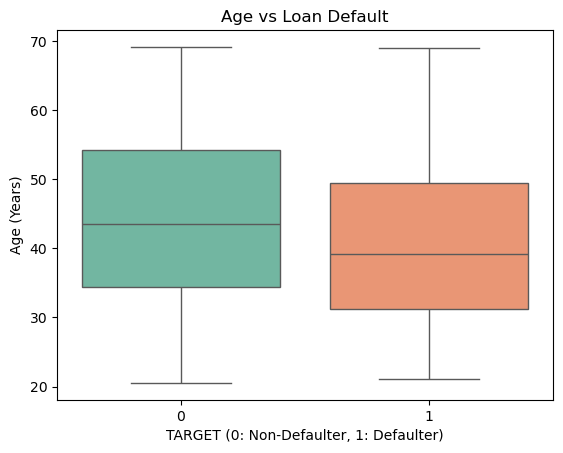

In [26]:
sns.boxplot(x='TARGET', y='AGE', data=data, palette='Set2')
plt.title('Age vs Loan Default')
plt.xlabel('TARGET (0: Non-Defaulter, 1: Defaulter)')
plt.ylabel('Age (Years)')
plt.savefig('Age vs Loan Default.png')
plt.show()

Observations
* Median age of defaulters is lower than that of non-defaulters, which means younger borrowers are more likely to default compared to older applicants.
* higher median age for defaulters, which means older applicants may be more financially stable or experienced in managing credit

#### Gender vs Default Rate

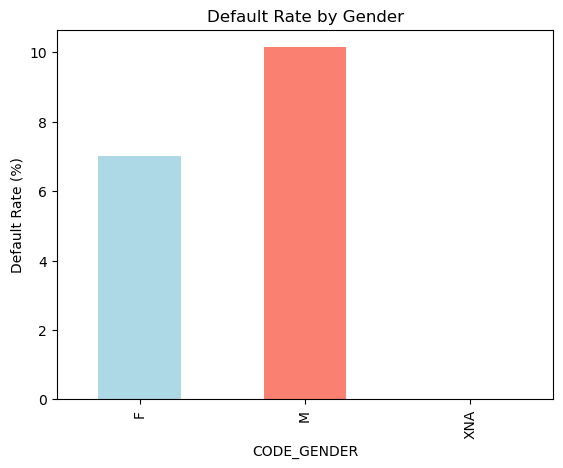

In [27]:
gender_default = data.groupby('CODE_GENDER')['TARGET'].mean() * 100
gender_default.plot(kind='bar', color=['lightblue','salmon'])
plt.title('Default Rate by Gender')
plt.ylabel('Default Rate (%)')
plt.show()

observations
* Male applicants show a slightly higher default rate compared to female applicants, which may reflect differences in financial behavior or employment stability.

#### Education vs Default

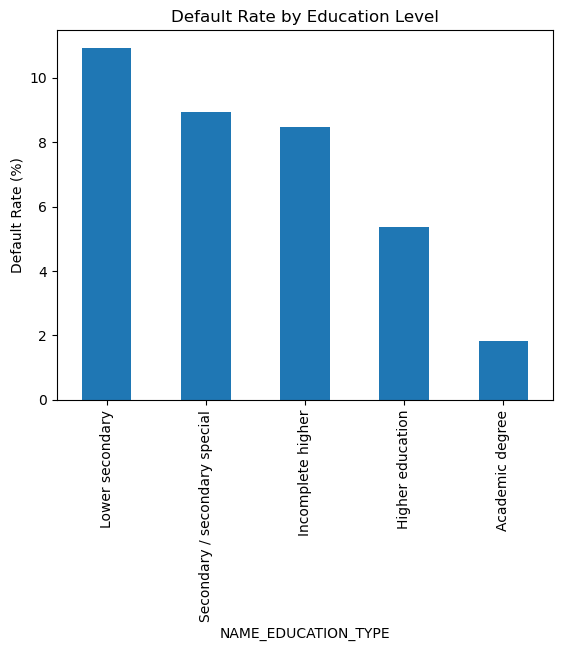

In [28]:
edu_default = data.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False) * 100
edu_default.plot(kind='bar')
plt.title('Default Rate by Education Level')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=90)
plt.show()

observations
* Applicants with lower education levels (e.g., “Secondary / Secondary special”) have higher default rates.
* Higher education tends to correlate with better income and repayment discipline.

#### Housing Type vs Default

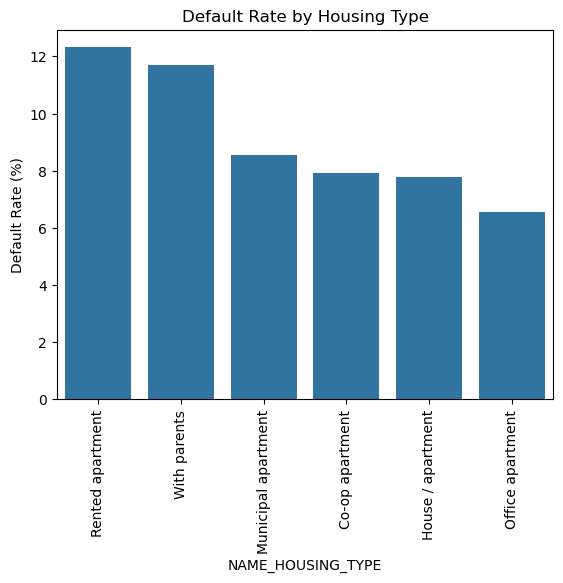

In [29]:
house_default = data.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().sort_values(ascending=False) * 100
sns.barplot(data=house_default)
plt.title('Default Rate by Housing Type')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=90)
plt.show()

Observations
* Applicants living in rented houses or with parents show higher default rates than those living in their own homes — an indicator of financial stability.

#### Correlation Heatmap

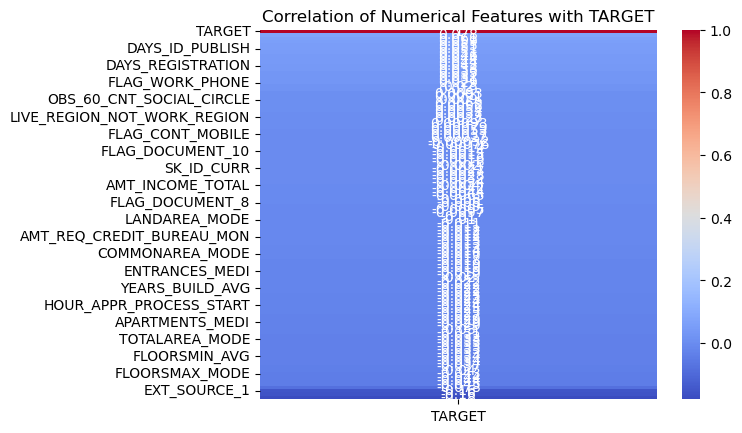

In [30]:
sns.heatmap(data.corr(numeric_only=True)[['TARGET']].sort_values(by='TARGET', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title('Correlation of Numerical Features with TARGET')
plt.savefig('Correlation of Numerical Features with TARGET.png')
plt.show()

Observations
* Graph shows both negative and positive correlation with default rate  

In [31]:
numeric_df = data.select_dtypes(include=['int64', 'float64'])   # Select only numerical columns
corr_with_target = numeric_df.corr()['TARGET'].sort_values(ascending=False)


top_positive_corr = corr_with_target.head(16)[1:] # skip TARGET itself; positively correlated feature; (higher value → higher chance of default)

top_negative_corr = corr_with_target.tail(15)  # Negatively correlated features (higher value → lower chance of default)

print("Top 15 Positively Correlated Features with Default (TARGET=1):")
print(top_positive_corr)

print("\nTop 15 Negatively Correlated Features with Default (TARGET=1):")
print(top_negative_corr)


Top 15 Positively Correlated Features with Default (TARGET=1):
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
Name: TARGET, dtype: float64

Top 15 Negatively Correlated Features with Default (TARGET=1):
LIVINGAREA_AVG               -0.032997
FLOORSMIN_MEDI               -0.033394
FLOORSMIN_AVG                -0.033614
ELEVATORS_MEDI               -0.033863
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_

Observations
* Most features show weak correlation with TARGET, indicating that **default behavior depends on multiple factors rather than any single variable**
* Positively Correlated Features (Higher values → Higher chance of default)
    * `DAYS_BIRTH` (0.078): Older applicants tend to have slightly higher default risk
* Negatively Correlated Features (Higher values → Lower chance of default)
    * `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3`: External credit scores are strong predictors of lower default risk
* External sources `(EXT_SOURCE_*)` are the most powerful predictors and should be prioritized in feature selection.

### Data Preparation
* Prepare the dataset for machine learning by cleaning, encoding, scaling, and handling class imbalance so models can learn effectively.

#### Handle Missing Values

In [32]:
data.isnull().sum().sum()

9152465

In [33]:
# Define threshold for dropping columns
THRESHOLD = 40  # percent

for name, df in datasets.items():
    print(f"\nProcessing Dataset: {name}")
    
    # Drop columns with high missing values 
    missing_percent = (df.isnull().mean() * 100)
    drop_cols = missing_percent[missing_percent > THRESHOLD].index.tolist()
    df.drop(columns=drop_cols, inplace=True)
    print(f"Dropped {len(drop_cols)} columns with > {THRESHOLD}% missing values")
    
    # Fill numeric columns with MEDIAN 
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        df[col].fillna(df[col].median(), inplace=True)
    
    # Fill categorical columns with MODE
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    remaining_missing = df.isnull().sum().sum()
    print(f"Remaining Missing Values After Treatment: {remaining_missing}")
    print("-" * 60)


Processing Dataset: application_train
Dropped 49 columns with > 40% missing values
Remaining Missing Values After Treatment: 0
------------------------------------------------------------

Processing Dataset: bureau
Dropped 2 columns with > 40% missing values
Remaining Missing Values After Treatment: 0
------------------------------------------------------------

Processing Dataset: bureau_balance
Dropped 0 columns with > 40% missing values
Remaining Missing Values After Treatment: 0
------------------------------------------------------------

Processing Dataset: credit_card_balance
Dropped 0 columns with > 40% missing values
Remaining Missing Values After Treatment: 0
------------------------------------------------------------

Processing Dataset: installments_payments
Dropped 0 columns with > 40% missing values
Remaining Missing Values After Treatment: 0
------------------------------------------------------------

Processing Dataset: pos_cash_balance
Dropped 0 columns with > 40% 

Observations
* Columns such as `COMMONAREA_MEDI`,`OWN_CAR_AGE`, `AMT_REQ_CREDIT_BUREAU_HOUR`, and `EXT_SOURCE_1` have over 40% missing data and may not contribute meaningful information. These can be dropped to simplify the dataset.

#### Outlier Detection & Treatment

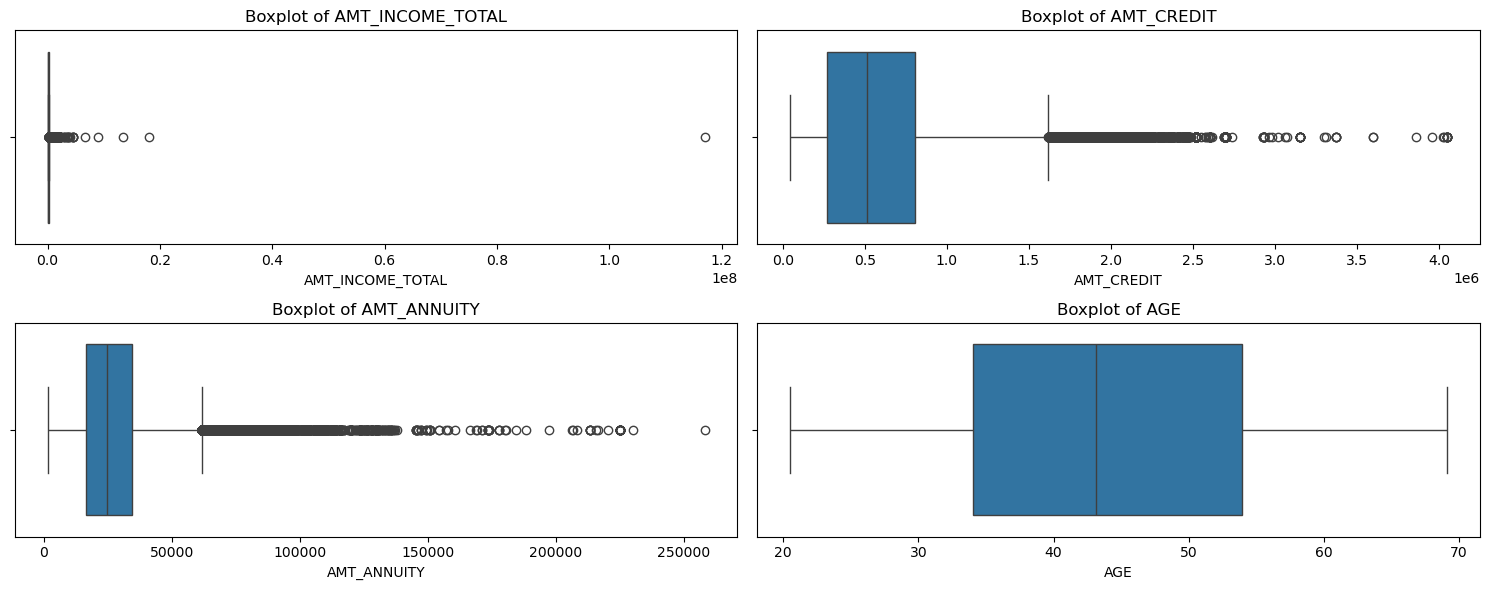

In [34]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AGE'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [35]:
for name, df in datasets.items():
    print(f"\nProcessing Outliers for Dataset: {name}")

    # Select only numerical columns except TARGET
    num_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
                if col != "TARGET"]

    outlier_count = 0

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        if IQR == 0:  # skip constant columns
            continue

        lower_cap = Q1 - 1.5 * IQR
        upper_cap = Q3 + 1.5 * IQR

        col_outliers = ((df[col] < lower_cap) | (df[col] > upper_cap)).sum()
        outlier_count += col_outliers

        df[col] = df[col].clip(lower_cap, upper_cap)

    print(f"Total Outliers Capped: {outlier_count}")


Processing Outliers for Dataset: application_train
Total Outliers Capped: 192760

Processing Outliers for Dataset: bureau
Total Outliers Capped: 1026866

Processing Outliers for Dataset: bureau_balance
Total Outliers Capped: 0

Processing Outliers for Dataset: credit_card_balance
Total Outliers Capped: 2266867

Processing Outliers for Dataset: installments_payments
Total Outliers Capped: 4555165

Processing Outliers for Dataset: pos_cash_balance
Total Outliers Capped: 1193507

Processing Outliers for Dataset: previous_application
Total Outliers Capped: 1418876


Observations
* Outlier analysis showed extreme values in key financial variables.
* These were treated using IQR filtering and percentile capping to maintain data integrity while reducing skew.
* Post-treatment statistics confirm reduced variance and improved stability, making the dataset suitable for scaling and model training.

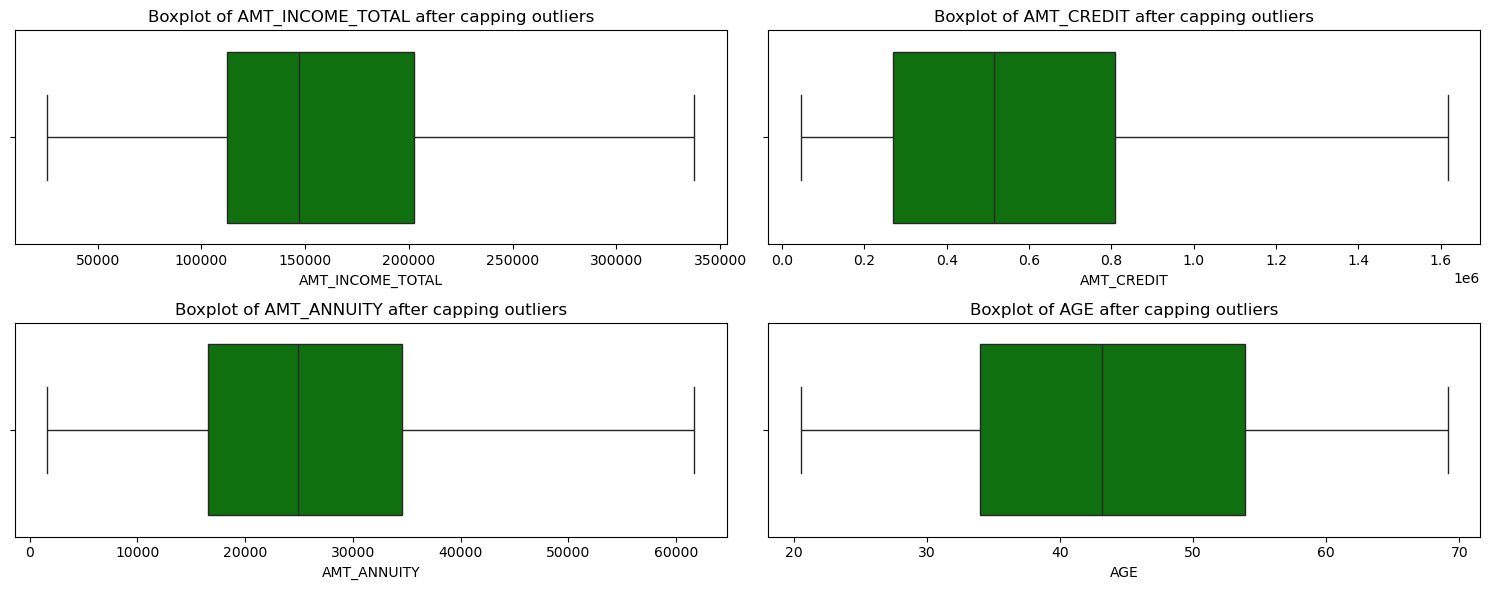

In [36]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AGE'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col], color='green')
    plt.title(f'Boxplot of {col} after capping outliers')
plt.tight_layout()
plt.show()

#### Feature Engineering
* Feature Engineering is the process of transforming raw data into meaningful features (input variables) that help machine-learning models learn better and make more accurate predictions.

**Basic Financial Ratio Features**

In [37]:
app = datasets['application_train']

# Loan to income ratio
app['CREDIT_INCOME_RATIO'] = app['AMT_CREDIT'] / (app['AMT_INCOME_TOTAL'] + 1)

# Annuity to income ratio
app['ANNUITY_INCOME_RATIO'] = app['AMT_ANNUITY'] / (app['AMT_INCOME_TOTAL'] + 1)

# Credit term (loan duration)
app['CREDIT_TERM'] = app['AMT_CREDIT'] / (app['AMT_ANNUITY'] + 1)

# Goods price to credit ratio
app['GOODS_CREDIT_RATIO'] = app['AMT_GOODS_PRICE'] / (app['AMT_CREDIT'] + 1)

Observations
* These ratios normalize financial amounts to customer income, improving comparability across applicants with different income levels.
* `CREDIT_INCOME_RATIO` and `ANNUITY_INCOME_RATIO` measure **debt burden** — higher values indicate potential repayment stress.
* `CREDIT_TERM` (credit ÷ annuity) approximates **loan duration** — longer terms may indicate higher default risk.
* `GOODS_CREDIT_RATIO` shows how much of the loan is backed by goods, indicating **loan-to-value** characteristics.
* These engineered ratios capture affordability and repayment capacity — key drivers of loan default probability.

**Bureau Data Aggregation**

In [38]:
bureau = datasets['bureau']

bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'CREDIT_ACTIVE': 'count',
    'AMT_CREDIT_SUM': ['mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['max'],
    'DAYS_CREDIT': ['min', 'max', 'mean']
})

bureau_agg.columns = ['_'.join(col) for col in bureau_agg.columns]
app = app.merge(bureau_agg, on='SK_ID_CURR', how='left')

Observations
* Aggregating bureau records at the client level provides **external credit exposure**.
* High values in `AMT_CREDIT_SUM_DEBT_SUM` or frequent loans (`CREDIT_ACTIVE_count`) suggest **credit saturation**.
* `DAYS_CREDIT_mean` and `DAYS_CREDIT_min` indicate **recency of previous credit** — recent multiple loans raise risk.
* Captures **financial discipline and exposure** across other institutions — vital for credit risk scoring.

**Previous Loan Applications**

In [39]:
prev = datasets['previous_application']

prev_agg = prev.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION': ['mean', 'max'],
    'AMT_CREDIT': ['mean', 'max'],
    'NAME_CONTRACT_STATUS': lambda x: (x == 'Refused').sum(),
    'DAYS_DECISION': ['max', 'mean']
})

prev_agg.columns = ['_'.join(col) for col in prev_agg.columns]
prev_agg.rename(columns={'NAME_CONTRACT_STATUS_<lambda>':'PREV_APP_REFUSED_COUNT'}, inplace=True)

app = app.merge(prev_agg, on='SK_ID_CURR', how='left')

Observations
* `PREV_APP_REFUSED_COUNT` captures customer’s **historical rejection frequency**, which often correlates with higher default odds.
* `AMT_APPLICATION_mean` vs. `AMT_CREDIT_mean` shows **requested vs approved** trends — consistent high gaps may indicate over-asking behavior.
* Recent decisions (`DAYS_DECISION_max`) reflect **credit-seeking patterns** — multiple recent applications can raise risk.
* Represents **Home Credit’s internal behavioral footprint**, combining approval trends and risk appetite indicators.


**Credit Card Behavior Features**

In [40]:
cc = datasets['credit_card_balance']

cc_agg = cc.groupby('SK_ID_CURR').agg({
    'AMT_BALANCE': ['mean', 'max'],
    'AMT_DRAWINGS_CURRENT': ['sum', 'max'],
    'CNT_DRAWINGS_CURRENT': ['sum'],
    'SK_DPD': ['max']
})

cc_agg.columns = ['_'.join(col) for col in cc_agg.columns]
app = app.merge(cc_agg, on='SK_ID_CURR', how='left')

Observations
* High `AMT_BALANCE_mean` or `SK_DPD_max` indicates **ongoing revolving debt** and late payments.
* Large drawing activity (`AMT_DRAWINGS_CURRENT_sum`) suggests **credit-hungry** behavior, often linked to elevated risk.
* Summarizes **credit utilization** and **repayment discipline** in revolving accounts.

**Installment Payment Behavior**

In [41]:
inst = datasets['installments_payments']

inst['PAYMENT_DIFF'] = inst['AMT_PAYMENT'] - inst['AMT_INSTALMENT']
inst['LATE_PAYMENT'] = (inst['DAYS_ENTRY_PAYMENT'] > inst['DAYS_INSTALMENT']).astype(int)

inst_agg = inst.groupby('SK_ID_CURR').agg({
    'PAYMENT_DIFF': ['mean', 'min'],
    'LATE_PAYMENT': ['mean', 'sum'],
    'AMT_PAYMENT': ['mean', 'sum']
})

inst_agg.columns = ['_'.join(col) for col in inst_agg.columns]
app = app.merge(inst_agg, on='SK_ID_CURR', how='left')

Observations
* `PAYMENT_DIFF` identifies underpayment or overpayment behavior; persistent underpayments indicate potential stress.
* `LATE_PAYMENT_mean` quantifies **frequency of late repayments**, which is directly predictive of future default.
* Represents **actual payment performance** — one of the strongest signals for modeling default risk.

**POS Cash Loan Behavior**

In [42]:
pos = datasets['pos_cash_balance']

pos_agg = pos.groupby('SK_ID_CURR').agg({
    'SK_DPD': ['max', 'mean'],
    'CNT_INSTALMENT': ['mean']
})

pos_agg.columns = ['_'.join(col) for col in pos_agg.columns]
app = app.merge(pos_agg, on='SK_ID_CURR', how='left')

Observations
* `SK_DPD_mean` and `SK_DPD_max` show **timeliness in short-term POS/Cash loans**.
* `CNT_INSTALMENT_mean` gives average active loan duration — shorter terms imply quick repayments, longer terms imply riskier loans.
* Captures **behavior on consumer credit products**, expanding the view beyond traditional loans.

In [43]:
app.fillna(0, inplace=True)

Observations
* Missing values in newly engineered features (due to absent linked records) were replaced with zeros.
* This approach treats “no record” as “no credit history”, which is meaningful in this domain.
* Ensures all applicants are represented consistently in the model, avoiding NaN-induced bias during training.

#### Merging dataset
* Merging datasets provides a 360° view of customer financial behavior. Each dataset adds unique predictive information, and without merging, the model would miss crucial signals such as repayment behavior, past loan history, and credit utilization trends
* We aggregate because supporting datasets contain multiple records per customer (one-to-many relationship).
* Aggregation summarizes these into meaningful customer-level features (mean, count, max, etc.), enabling a clean one-to-one merge with application_train and improving model performance

In [44]:
# 1. Merge bureau_balance → bureau (based on SK_ID_BUREAU)
bureau_balance_agg = bureau_balance.groupby("SK_ID_BUREAU").agg({
    'MONTHS_BALANCE': ['min', 'max', 'mean'],
    'STATUS': 'nunique'
})

# Flatten the multi-level column names
bureau_balance_agg.columns = ['_'.join(col).strip() for col in bureau_balance_agg.columns.values]

# Now merge with flattened column names
bureau = bureau.merge(bureau_balance_agg, on="SK_ID_BUREAU", how="left")

# Aggregate bureau to SK_ID_CURR level
# Select only numeric columns for aggregation
numeric_columns = bureau.select_dtypes(include=['number']).columns.tolist()
numeric_columns = [col for col in numeric_columns if col != 'SK_ID_CURR']  # Exclude the groupby column

# Apply aggregation only on numeric columns
bureau_agg = bureau.groupby("SK_ID_CURR")[numeric_columns].agg('mean')
bureau_agg.columns = ["BUREAU_" + col for col in bureau_agg.columns]

# Merge into main dataset
data = data.merge(bureau_agg, on="SK_ID_CURR", how="left")

In [45]:
# 2. Aggregate previous_application dataset
# First, identify numeric columns that can have mean calculated
numeric_cols = previous_application.select_dtypes(include=['number']).columns.tolist()

# Aggregate only numeric columns with mean
prev_agg = previous_application.groupby("SK_ID_CURR")[numeric_cols].agg('mean')
prev_agg.columns = ["PREV_" + col for col in prev_agg.columns]

# Merge with main data
data = data.merge(prev_agg, on="SK_ID_CURR", how="left")

In [46]:
# 3. Aggregate POS_CASH_balance dataset
# Select only numeric columns for mean aggregation
numeric_columns = pos_cash_balance.select_dtypes(include=['number']).columns.drop('SK_ID_CURR', errors='ignore')
pos_agg = pos_cash_balance.groupby("SK_ID_CURR")[numeric_columns].mean()

pos_agg.columns = ["POS_" + col for col in pos_agg.columns]

data = data.merge(pos_agg, on="SK_ID_CURR", how="left")

In [47]:
# 4. Aggregate installments_payments dataset
inst_agg = installments_payments.groupby("SK_ID_CURR").agg('mean')
inst_agg.columns = ["INS_" + col for col in inst_agg.columns]

data = data.merge(inst_agg, on="SK_ID_CURR", how="left")

In [48]:
# 5. Aggregate credit_card_balance dataset
# First, select only numeric columns for mean aggregation
numeric_cols = credit_card_balance.select_dtypes(include=['number']).columns
object_cols = credit_card_balance.select_dtypes(exclude=['number']).columns

# Create aggregations dictionary - mean for numeric columns, first for non-numeric
agg_dict = {}
for col in numeric_cols:
    if col != 'SK_ID_CURR':  # Skip the ID column
        agg_dict[col] = 'mean'

# Apply aggregation
credit_agg = credit_card_balance.groupby("SK_ID_CURR").agg(agg_dict)
credit_agg.columns = ["CARD_" + col for col in credit_agg.columns]

# Merge with main dataframe
data = data.merge(credit_agg, on="SK_ID_CURR", how="left")

Observations
* All supporting datasets were aggregated using mean values at SK_ID_CURR level and merged with application_train. Feature name prefixes were applied (e.g., BUREAU_, PREV_, INS_) for feature traceability.
* This enriches the dataset with additional behavioral, transactional and credit history features improving prediction quality.

In [49]:
print("Final dataset shape:", data.shape)

Final dataset shape: (307511, 141)


#### Handling null values after merging

In [50]:
data.isnull().sum()

SK_ID_CURR                              0
TARGET                                  0
NAME_CONTRACT_TYPE                      0
CODE_GENDER                             0
FLAG_OWN_CAR                            0
FLAG_OWN_REALTY                         0
CNT_CHILDREN                            0
AMT_INCOME_TOTAL                        0
AMT_CREDIT                              0
AMT_ANNUITY                             0
AMT_GOODS_PRICE                         0
NAME_TYPE_SUITE                         0
NAME_INCOME_TYPE                        0
NAME_EDUCATION_TYPE                     0
NAME_FAMILY_STATUS                      0
NAME_HOUSING_TYPE                       0
REGION_POPULATION_RELATIVE              0
DAYS_BIRTH                              0
DAYS_EMPLOYED                           0
DAYS_REGISTRATION                       0
DAYS_ID_PUBLISH                         0
FLAG_MOBIL                              0
FLAG_EMP_PHONE                          0
FLAG_WORK_PHONE                   

In [51]:
num_cols = data.select_dtypes(include=['number']).columns
num_cols = num_cols.drop('TARGET')

cat_cols = data.select_dtypes(include=['object']).columns  

data[num_cols] = data[num_cols].fillna(data[num_cols].median())
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

In [52]:
data.isnull().sum().sum()

0

#### Categorical Encoding

In [53]:
# Identify categorical columns
cat_cols = data.select_dtypes(include=['object']).columns

print("Total Categorical Columns:", len(cat_cols))
print(cat_cols)

Total Categorical Columns: 12
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')


In [54]:
# Label Encoding for Binary Categorical Column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
binary_cols = [col for col in cat_cols if data[col].nunique() == 2]

for col in binary_cols:
    data[col] = le.fit_transform(data[col])

print("Binary columns encoded:", binary_cols)

Binary columns encoded: ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']


In [55]:
# One-Hot Encoding for Multi-category Columns

multi_cat_cols = []

for col in cat_cols:
    if col not in binary_cols:
        multi_cat_cols.append(col)

data = pd.get_dummies(data, columns=multi_cat_cols, drop_first=True)

print("Multi-category columns one-hot encoded:", multi_cat_cols)

Multi-category columns one-hot encoded: ['CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


In [56]:
print("Data shape after encoding:", data.shape)

Data shape after encoding: (307511, 241)


Observations
* Categorical variables were identified and classified into binary and multi-category groups.
* Binary categorical columns were encoded using **LabelEncoder**, converting them into numeric values (0 and 1).
* Multi-category variables were encoded using **one-hot encoding** `(pd.get_dummies())`, creating separate indicator variables while avoiding the dummy variable trap using **drop_first=True**.
* After encoding, the dataset became fully numeric and ready for modeling.

#### Feature Scaling
* Bring all numerical features to a similar scale so that models like Logistic Regression, SVM, and KNN perform better

In [57]:
from sklearn.preprocessing import StandardScaler

numeric_cols = data.select_dtypes(include=['float64', 'int64']).drop(columns=['TARGET'])

df_before = numeric_cols.copy()

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(numeric_cols), columns=numeric_cols.columns)

In [58]:
# Compare Before vs After
cols = numeric_cols.columns[:10]

summary_before = df_before[cols].agg(['mean', 'std']).T
summary_after = df_scaled[cols].agg(['mean', 'std']).T

comparison = pd.concat(
    [summary_before.add_suffix('_Before'),
     summary_after.add_suffix('_After')],
    axis=1
).round(3)

print("\nFeature Scaling Comparison (Mean & Std):\n")
print(comparison)


Feature Scaling Comparison (Mean & Std):

                            mean_Before  std_Before  mean_After  std_After
SK_ID_CURR                   278180.519  102790.175        -0.0        1.0
CNT_CHILDREN                      0.407       0.684        -0.0        1.0
AMT_INCOME_TOTAL             162626.948   73303.151        -0.0        1.0
AMT_CREDIT                   592313.037  380316.241        -0.0        1.0
AMT_ANNUITY                   26797.657   13281.286        -0.0        1.0
AMT_GOODS_PRICE              527855.325  337010.363         0.0        1.0
REGION_POPULATION_RELATIVE        0.020       0.012         0.0        1.0
DAYS_BIRTH                   -16036.995    4363.989         0.0        1.0
DAYS_EMPLOYED                 -1203.542    2732.405        -0.0        1.0
DAYS_REGISTRATION             -4983.513    3513.934         0.0        1.0


Observation 
* Numerical features were standardized using StandardScaler, transforming them to have zero mean and unit variance.
* This improves algorithm performance by ensuring that all numerical variables contribute equally and prevents models from being biased toward features with larger magnitude.

### Model Building

#### Data Preparation

In [89]:
X = data.drop("TARGET", axis=1)
y = data["TARGET"]

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)    # stratify=y keeps the original imbalance in test set so model evaluation is realistic

In [91]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (246008, 240)
Test shape: (61503, 240)


#### Clean column names

In [92]:
# Ensure both are DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Clean feature names identically
def clean_cols(df):
    df.columns = (
        df.columns
        .str.replace('[^0-9a-zA-Z_]', '_', regex=True)
        .str.replace('__+', '_', regex=True)   # avoid double underscores
        .str.strip('_')                        # remove leading/trailing _
    )
    return df

X_train = clean_cols(X_train)
X_test = clean_cols(X_test)


In [106]:
print(X_train.columns.equals(X_test.columns))

True


#### Handle Class Imbalance 

In [93]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# print("Before SMOTE:")
# print(y_train.value_counts())

# print("\nAfter SMOTE:")
# print(y_train_res.value_counts())

#### Compute Class Weights automatically

In [94]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

class_weights_dict = {cls: weight for cls, weight in zip(classes, class_weights)}
print(class_weights_dict)


{0: 0.5439092983356032, 1: 6.193554884189325}


#### Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    auc
)

base_log_reg = LogisticRegression(
    max_iter=500,
    random_state=42
)


param_dist = {
    "C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10],
    "solver": ["lbfgs", "saga"],
    "class_weight": ["balanced", class_weights_dict]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


rand_search = RandomizedSearchCV(
    estimator=base_log_reg,
    param_distributions=param_dist,
    n_iter=10,                   # faster than grid search
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42
)


rand_search.fit(X_train, y_train)

print("Best Parameters:", rand_search.best_params_)
print("Best CV ROC-AUC:", rand_search.best_score_)

log_reg_best = rand_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'solver': 'saga', 'class_weight': 'balanced', 'C': 0.1}
Best CV ROC-AUC: 0.6677197233159401


In [108]:
# test evaluation
train_pred = log_reg_best.predict(X_train)
train_proba = log_reg_best.predict_proba(X_train)[:, 1]

roc_auc_lr_train = roc_auc_score(y_train, train_proba)
precision_train, recall_train, _ = precision_recall_curve(y_train, train_proba)
pr_auc_lr_train = auc(recall_train, precision_train)

print("\nTuned Logistic Regression - TRAIN RESULTS")
print("-------------------------------------------")
print("ROC AUC (Train):", roc_auc_lr_train)
print("PR AUC  (Train):", pr_auc_lr_train)
print(classification_report(y_train, train_pred))

# test evaluation
test_pred = log_reg_best.predict(X_test)
test_proba = log_reg_best.predict_proba(X_test)[:, 1]

roc_auc_lr_test = roc_auc_score(y_test, test_proba)
precision_test, recall_test, _ = precision_recall_curve(y_test, test_proba)
pr_auc_lr_test = auc(recall_test, precision_test)

print("\nTuned Logistic Regression - TEST RESULTS")
print("-------------------------------------------")
print("ROC AUC (Test):", roc_auc_lr_test)
print("PR AUC  (Test):", pr_auc_lr_test)
print(classification_report(y_test, test_pred))


Tuned Logistic Regression - TRAIN RESULTS
-------------------------------------------
ROC AUC (Train): 0.6705958706452535
PR AUC  (Train): 0.15032199364334523
              precision    recall  f1-score   support

           0       0.95      0.64      0.76    226148
           1       0.13      0.61      0.21     19860

    accuracy                           0.64    246008
   macro avg       0.54      0.63      0.49    246008
weighted avg       0.88      0.64      0.72    246008


Tuned Logistic Regression - TEST RESULTS
-------------------------------------------
ROC AUC (Test): 0.669689196906557
PR AUC  (Test): 0.14942475925080817
              precision    recall  f1-score   support

           0       0.95      0.64      0.76     56538
           1       0.13      0.61      0.21      4965

    accuracy                           0.64     61503
   macro avg       0.54      0.63      0.49     61503
weighted avg       0.88      0.64      0.72     61503



Observations
*  **Train and test metrics are nearly identical**, indicating **no overfitting** — the model generalizes consistently but remains weak.
* **ROC-AUC (~0.67) and PR-AUC (~0.15) are low**, confirming that Logistic Regression cannot capture the dataset’s complexity.
* **Recall for the minority class is high (0.61)** due to threshold tuning, but this comes at the cost of **very low precision (0.13)**.
* **F1-score for class 1 remains poor (0.21)**, indicating high false positives and poor decision boundary separation.
* **Overall accuracy is misleadingly high (0.64)** due to class imbalance — the model struggles significantly on the minority class despite tuning.

#### Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    auc
)
import numpy as np

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)


param_dist = {
    "n_estimators": [100, 150, 200, 250],
    "max_depth": [10, 15, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "class_weight": ["balanced", class_weights_dict]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=12,                # FAST but effective
    scoring="roc_auc",
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

search_rf.fit(X_train, y_train)

print("Best Parameters:", search_rf.best_params_)
print("Best CV ROC-AUC:", search_rf.best_score_)

rf_best = search_rf.best_estimator_


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced'}
Best CV ROC-AUC: 0.7469645286955872


In [112]:
# ==== TRAIN EVALUATION ====
train_pred = rf_best.predict(X_train)
train_proba = rf_best.predict_proba(X_train)[:, 1]

roc_auc_rf_train = roc_auc_score(y_train, train_proba)
precision_train, recall_train, _ = precision_recall_curve(y_train, train_proba)
pr_auc_rf_train = auc(recall_train, precision_train)

print("\nTuned RandomForest - TRAIN RESULTS")
print("-------------------------------------------")
print("ROC AUC (Train):", roc_auc_rf_train)
print("PR AUC  (Train):", pr_auc_rf_train)
print(classification_report(y_train, train_pred))


# ==== TEST EVALUATION ====
test_pred = rf_best.predict(X_test)
test_proba = rf_best.predict_proba(X_test)[:, 1]

roc_auc_rf_test = roc_auc_score(y_test, test_proba)
precision_test, recall_test, _ = precision_recall_curve(y_test, test_proba)
pr_auc_rf_test = auc(recall_test, precision_test)

print("\nTuned RandomForest - TEST RESULTS")
print("-------------------------------------------")
print("ROC AUC (Test):", roc_auc_rf_test)
print("PR AUC  (Test):", pr_auc_rf_test)
print(classification_report(y_test, test_pred))



Tuned RandomForest - TRAIN RESULTS
-------------------------------------------
ROC AUC (Train): 1.0
PR AUC  (Train): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226148
           1       1.00      1.00      1.00     19860

    accuracy                           1.00    246008
   macro avg       1.00      1.00      1.00    246008
weighted avg       1.00      1.00      1.00    246008


Tuned RandomForest - TEST RESULTS
-------------------------------------------
ROC AUC (Test): 0.7571497992046416
PR AUC  (Test): 0.23294515070293276
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.59      0.00      0.01      4965

    accuracy                           0.92     61503
   macro avg       0.76      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503



Observations
*  **Train metrics are unrealistically perfect (ROC=1.0, PR=1.0, F1=1.0)** — this confirms **severe overfitting**; the model memorized the training data.
* **Test recall for class 1 completely collapses to 0.00**, meaning the model **fails to detect minority cases** at the default threshold.
* **Precision for class 1 is high (0.59)**, but since recall is 0, it predicts almost no positives — the model is playing safe and avoiding minority predictions.
* **Huge train–test performance gap** shows the RandomForest cannot generalize on this dataset due to imbalance + high complexity.
* **Overall accuracy (0.92)** on test is misleading — it comes entirely from predicting class 0; the model is practically useless for the minority class without threshold tuning or rebalancing.

#### XGBoost

In [113]:
scale_pos_weight = class_weights_dict[1] / class_weights_dict[0]
print("scale_pos_weight =", scale_pos_weight)

scale_pos_weight = 11.38710976837865


In [114]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    auc
)

xgb_model = xgb.XGBClassifier(
    tree_method="hist",          # Fast
    eval_metric="auc",
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42,
    scale_pos_weight=scale_pos_weight   # <--- IMPORTANT
)

param_dist = {
    "n_estimators": [200, 300, 400, 500],
    "max_depth": [4, 5, 6, 8],
    "learning_rate": [0.03, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=12,            # Fast but effective
    scoring="roc_auc",
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)


search_xgb.fit(X_train, y_train)

print("Best Parameters:", search_xgb.best_params_)
print("Best CV ROC-AUC:", search_xgb.best_score_)

xgb_best = search_xgb.best_estimator_


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.03, 'gamma': 0, 'colsample_bytree': 0.8}
Best CV ROC-AUC: 0.7709209300984105


In [115]:
# ==== TRAIN EVALUATION ====
train_pred = xgb_best.predict(X_train)
train_proba = xgb_best.predict_proba(X_train)[:, 1]

roc_auc_xgb_train = roc_auc_score(y_train, train_proba)
precision_train, recall_train, _ = precision_recall_curve(y_train, train_proba)
pr_auc_xgb_train = auc(recall_train, precision_train)

print("\nTuned XGBoost - TRAIN RESULTS")
print("-----------------------------------------")
print("ROC AUC (Train):", roc_auc_xgb_train)
print("PR AUC  (Train):", pr_auc_xgb_train)
print(classification_report(y_train, train_pred))


# ==== TEST EVALUATION ====
test_pred = xgb_best.predict(X_test)
test_proba = xgb_best.predict_proba(X_test)[:, 1]

roc_auc_xgb_test = roc_auc_score(y_test, test_proba)
precision_test, recall_test, _ = precision_recall_curve(y_test, test_proba)
pr_auc_xgb_test = auc(recall_test, precision_test)

print("\nTuned XGBoost - TEST RESULTS")
print("-----------------------------------------")
print("ROC AUC (Test):", roc_auc_xgb_test)
print("PR AUC  (Test):", pr_auc_xgb_test)
print(classification_report(y_test, test_pred))



Tuned XGBoost - TRAIN RESULTS
-----------------------------------------
ROC AUC (Train): 0.8550454648170317
PR AUC  (Train): 0.38665192539181625
              precision    recall  f1-score   support

           0       0.98      0.76      0.86    226148
           1       0.23      0.78      0.35     19860

    accuracy                           0.77    246008
   macro avg       0.60      0.77      0.60    246008
weighted avg       0.91      0.77      0.82    246008


Tuned XGBoost - TEST RESULTS
-----------------------------------------
ROC AUC (Test): 0.7776624653019686
PR AUC  (Test): 0.2755749283754297
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     56538
           1       0.19      0.66      0.30      4965

    accuracy                           0.75     61503
   macro avg       0.58      0.71      0.57     61503
weighted avg       0.90      0.75      0.80     61503



Observations
*  **XGBoost shows good generalization** — train and test metrics are close, with only moderate overfitting (Train ROC 0.85 → Test ROC 0.78).
* **Recall for the minority class is very strong** on both train (0.78) and test (0.66), meaning XGBoost effectively identifies positives.
* **Precision for class 1 is low (0.19–0.23)**, indicating many false positives — expected when optimizing recall in an imbalanced dataset.
* **F1-score for the minority class (0.30 test)** is significantly better than Logistic Regression and RandomForest, showing XGBoost handles the imbalance well.
* **Overall accuracy (~0.75)** is lowered intentionally due to aggressive positive predictions, but the model is performing the intended task—catching minority cases effectively.

#### LightGBM

In [116]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    auc
)

X_train = clean_feature_names(X_train)

lgbm = lgb.LGBMClassifier(
    objective="binary",
    boosting_type="gbdt",
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "n_estimators": [300, 500, 800, 1000],
    "learning_rate": [0.03, 0.05, 0.1],
    "max_depth": [-1, 6, 8, 10],
    "num_leaves": [31, 50, 70, 90],
    "subsample": [0.7, 0.8, 1.0],          # bagging_fraction
    "colsample_bytree": [0.7, 0.8, 1.0],   # feature_fraction
    "min_child_samples": [20, 40, 60],
    "class_weight": ["balanced", class_weights_dict]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

search_lgb = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=12,              # fast but effective
    scoring="roc_auc",
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

search_lgb.fit(X_train, y_train)

print("Best Parameters:", search_lgb.best_params_)
print("Best CV ROC-AUC:", search_lgb.best_score_)

lgb_best = search_lgb.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19907
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 228
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [117]:
# ==== TRAIN EVALUATION ====
train_pred = lgb_best.predict(X_train)
train_proba = lgb_best.predict_proba(X_train)[:, 1]

roc_auc_lgb_train = roc_auc_score(y_train, train_proba)
precision_train, recall_train, _ = precision_recall_curve(y_train, train_proba)
pr_auc_lgb_train = auc(recall_train, precision_train)

print("\nTuned LightGBM (class weights) - TRAIN RESULTS")
print("------------------------------------------------")
print("ROC AUC (Train):", roc_auc_lgb_train)
print("PR AUC  (Train):", pr_auc_lgb_train)
print(classification_report(y_train, train_pred))


# ==== TEST EVALUATION ====
test_pred = lgb_best.predict(X_test)
test_proba = lgb_best.predict_proba(X_test)[:, 1]

roc_auc_lgb_test = roc_auc_score(y_test, test_proba)
precision_test, recall_test, _ = precision_recall_curve(y_test, test_proba)
pr_auc_lgb_test = auc(recall_test, precision_test)

print("\nTuned LightGBM (class weights) - TEST RESULTS")
print("------------------------------------------------")
print("ROC AUC (Test):", roc_auc_lgb_test)
print("PR AUC  (Test):", pr_auc_lgb_test)
print(classification_report(y_test, test_pred))



Tuned LightGBM (class weights) - TRAIN RESULTS
------------------------------------------------
ROC AUC (Train): 0.8282903042257297
PR AUC  (Train): 0.33031898132844584
              precision    recall  f1-score   support

           0       0.97      0.74      0.84    226148
           1       0.20      0.76      0.32     19860

    accuracy                           0.74    246008
   macro avg       0.59      0.75      0.58    246008
weighted avg       0.91      0.74      0.80    246008


Tuned LightGBM (class weights) - TEST RESULTS
------------------------------------------------
ROC AUC (Test): 0.7771960410410459
PR AUC  (Test): 0.27368764877174645
              precision    recall  f1-score   support

           0       0.96      0.74      0.83     56538
           1       0.18      0.68      0.29      4965

    accuracy                           0.73     61503
   macro avg       0.57      0.71      0.56     61503
weighted avg       0.90      0.73      0.79     61503



Observations
* **LightGBM generalizes well** — train vs. test ROC-AUC (0.828 → 0.777) and PR-AUC (0.33 → 0.27) suggest moderate but acceptable overfitting.
* **Minority-class recall is excellent** (0.76 train, 0.68 test), showing LightGBM captures positive cases strongly under class weighting.
* **Precision for class 1 remains low** (0.18–0.20), indicating many false positives — expected when class weights push the model to identify positives aggressively.
* **F1-score for class 1 (0.29 test)** is almost on par with XGBoost, confirming LightGBM is also effective for imbalanced classification.
* **Weighted accuracy remains high (0.73 test)**, but like XGBoost, the model sacrifices accuracy for better minority detection — appropriate for this problem type.

#### CatBoost

In [96]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    auc
)

cat = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    random_state=42,
    verbose=False
)

param_dist = {
    "iterations": [300, 500, 800],
    "learning_rate": [0.03, 0.05, 0.1],
    "depth": [4, 5, 6, 7, 8],
    "l2_leaf_reg": [1, 3, 5, 7],
    "bagging_temperature": [0, 1, 2],
    "class_weights": [[class_weights_dict[0], class_weights_dict[1]]]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

search_cat = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=10,          # fast and effective
    scoring="roc_auc",
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

search_cat.fit(X_train, y_train)

print("Best Parameters:", search_cat.best_params_)
print("Best CV ROC-AUC:", search_cat.best_score_)

cat_best = search_cat.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 7, 'iterations': 500, 'depth': 4, 'class_weights': [0.5439092983356032, 6.193554884189325], 'bagging_temperature': 2}
Best CV ROC-AUC: 0.7722537427268974


In [97]:
# ==== TRAIN EVALUATION ====
train_pred = cat_best.predict(X_train)
train_proba = cat_best.predict_proba(X_train)[:, 1]

roc_auc_cat_train = roc_auc_score(y_train, train_proba)
precision_train, recall_train, _ = precision_recall_curve(y_train, train_proba)
pr_auc_cat_train = auc(recall_train, precision_train)

print("\nTuned CatBoost - TRAIN RESULTS")
print("-----------------------------------------")
print("ROC AUC (Train):", roc_auc_cat_train)
print("PR AUC  (Train):", pr_auc_cat_train)
print(classification_report(y_train, train_pred))


# ==== TEST EVALUATION ====
test_pred = cat_best.predict(X_test)
test_proba = cat_best.predict_proba(X_test)[:, 1]

roc_auc_cat_test = roc_auc_score(y_test, test_proba)
precision_test, recall_test, _ = precision_recall_curve(y_test, test_proba)
pr_auc_cat_test = auc(recall_test, precision_test)

print("\nTuned CatBoost - TEST RESULTS")
print("-----------------------------------------")
print("ROC AUC (Test):", roc_auc_cat_test)
print("PR AUC  (Test):", pr_auc_cat_test)
print(classification_report(y_test, test_pred))


Tuned CatBoost - TRAIN RESULTS
-----------------------------------------
ROC AUC (Train): 0.8047268818389675
PR AUC  (Train): 0.29222573762286436
              precision    recall  f1-score   support

           0       0.97      0.73      0.83    226148
           1       0.19      0.73      0.30     19860

    accuracy                           0.73    246008
   macro avg       0.58      0.73      0.57    246008
weighted avg       0.91      0.73      0.79    246008


Tuned CatBoost - TEST RESULTS
-----------------------------------------
ROC AUC (Test): 0.7799492481898743
PR AUC  (Test): 0.2759657672172409
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     56538
           1       0.18      0.69      0.29      4965

    accuracy                           0.73     61503
   macro avg       0.57      0.71      0.56     61503
weighted avg       0.90      0.73      0.79     61503



Observations
*  **CatBoost generalizes very cleanly** — train vs test ROC-AUC (0.805 → 0.780) and PR-AUC (0.292 → 0.276) show minimal overfitting compared to XGBoost/LightGBM.
* **Minority-class recall is strong** (0.73 train, 0.69 test), almost identical to LightGBM’s performance.
* **Precision remains low (0.18–0.19)**, consistent with boosting models optimized for recall on imbalanced data.
* **F1-score for class 1 (0.29 test)** is roughly equal to LightGBM and slightly below XGBoost (0.30 test), placing CatBoost in the same performance band.
* **Overall accuracy (~0.73)** shows CatBoost, like other boosting models, sacrifices accuracy to improve minority detection 

#### EasyEnsembleClassifier

In [99]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    auc
)

eec = EasyEnsembleClassifier(
    n_estimators=10,                # 10 balanced boosted models
    random_state=42
)


eec.fit(X_train, y_train)

eec_best = eec


In [100]:
# TRAIN EVALUATION
train_pred = eec_best.predict(X_train)
train_proba = eec_best.predict_proba(X_train)[:, 1]

roc_auc_eec_train = roc_auc_score(y_train, train_proba)
precision_train, recall_train, _ = precision_recall_curve(y_train, train_proba)
pr_auc_eec_train = auc(recall_train, precision_train)

print("\nEasyEnsembleClassifier - TRAIN RESULTS")
print("-----------------------------------------")
print("ROC AUC (Train):", roc_auc_eec_train)
print("PR AUC  (Train):", pr_auc_eec_train)
print(classification_report(y_train, train_pred))

# TEST EVALUATION
test_pred = eec_best.predict(X_test)
test_proba = eec_best.predict_proba(X_test)[:, 1]

roc_auc_eec_test = roc_auc_score(y_test, test_proba)
precision_test, recall_test, _ = precision_recall_curve(y_test, test_proba)
pr_auc_eec_test = auc(recall_test, precision_test)

print("\nEasyEnsembleClassifier - TEST RESULTS")
print("-----------------------------------------")
print("ROC AUC (Test):", roc_auc_eec_test)
print("PR AUC  (Test):", pr_auc_eec_test)
print(classification_report(y_test, test_pred))



EasyEnsembleClassifier - TRAIN RESULTS
-----------------------------------------
ROC AUC (Train): 0.75743718374519
PR AUC  (Train): 0.2351649586069385
              precision    recall  f1-score   support

           0       0.96      0.70      0.81    226148
           1       0.17      0.69      0.27     19860

    accuracy                           0.70    246008
   macro avg       0.56      0.69      0.54    246008
weighted avg       0.90      0.70      0.77    246008


EasyEnsembleClassifier - TEST RESULTS
-----------------------------------------
ROC AUC (Test): 0.7589390938736068
PR AUC  (Test): 0.24415639459253735
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     56538
           1       0.17      0.69      0.27      4965

    accuracy                           0.70     61503
   macro avg       0.56      0.69      0.54     61503
weighted avg       0.90      0.70      0.77     61503



Obsevations
* **Train and test metrics are almost identical**, showing **excellent generalization and no overfitting** — one of the most stable models.
* **Minority-class recall is very strong (0.69 on both train & test)**, matching the boosting models like CatBoost and LightGBM.
* **Precision for class 1 is low (0.17)**, leading to an F1-score of only 0.27 — expected since EEC heavily pushes recall through balanced bagging.
* **ROC-AUC (~0.758) and PR-AUC (~0.244)** are clearly below boosting models, confirming that EEC is good but **not as powerful as XGB/LGBM/CatBoost**.
* **Accuracy stays moderate (0.70)** because the model predicts more positives (to improve recall), which increases false positives but benefits minority detection.

#### Best Ensemble model (CatBoost + EEC + LGBM)

In [101]:
from catboost import CatBoostClassifier
import lightgbm as lgb
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import VotingClassifier

# CatBoost
cat = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    class_weights=[class_weights_dict[0], class_weights_dict[1]],
    random_state=42,
    verbose=False
)

# LightGBM
lgbm = lgb.LGBMClassifier(
    objective="binary",
    boosting_type="gbdt",
    class_weight=class_weights_dict,   # custom weights
    random_state=42,
    n_jobs=-1
)

# EasyEnsemble (best recall)
eec = EasyEnsembleClassifier(
    n_estimators=10,
    random_state=42
)


ensemble = VotingClassifier(
    estimators=[
        ('cat', cat),
        ('lgb', lgbm),
        ('eec', eec)
    ],
    voting='soft',     # blends probability outputs
    weights=[2, 2, 3], # give EEC more weight for recall
    n_jobs=-1
)


ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x00000207743293A0>),
                             ('lgb',
                              LGBMClassifier(class_weight={0: 0.5439092983356032,
                                                           1: 6.193554884189325},
                                             n_jobs=-1, objective='binary',
                                             random_state=42)),
                             ('eec', EasyEnsembleClassifier(random_state=42))],
                 n_jobs=-1, voting='soft', weights=[2, 2, 3])

In [102]:
from sklearn.metrics import roc_auc_score, classification_report, precision_recall_curve, auc

# TRAIN
train_pred = ensemble.predict(X_train)
train_proba = ensemble.predict_proba(X_train)[:, 1]

roc_auc_ens_train = roc_auc_score(y_train, train_proba)
prec_train, rec_train, _ = precision_recall_curve(y_train, train_proba)
pr_auc_ens_train = auc(rec_train, prec_train)

print("\nEnsemble Model - TRAIN RESULTS")
print("--------------------------------------------")
print("ROC AUC (Train):", roc_auc_ens_train)
print("PR AUC  (Train):", pr_auc_ens_train)
print(classification_report(y_train, train_pred))

# TEST
test_pred = ensemble.predict(X_test)
test_proba = ensemble.predict_proba(X_test)[:, 1]

roc_auc_ens_test = roc_auc_score(y_test, test_proba)
prec_test, rec_test, _ = precision_recall_curve(y_test, test_proba)
pr_auc_ens_test = auc(rec_test, prec_test)

print("\nEnsemble Model - TEST RESULTS")
print("--------------------------------------------")
print("ROC AUC (Test):", roc_auc_ens_test)
print("PR AUC  (Test):", pr_auc_ens_test)
print(classification_report(y_test, test_pred))



Ensemble Model - TRAIN RESULTS
--------------------------------------------
ROC AUC (Train): 0.8542454302889384
PR AUC  (Train): 0.3566211103059505
              precision    recall  f1-score   support

           0       0.98      0.76      0.86    226148
           1       0.23      0.79      0.35     19860

    accuracy                           0.77    246008
   macro avg       0.60      0.77      0.60    246008
weighted avg       0.92      0.77      0.82    246008


Ensemble Model - TEST RESULTS
--------------------------------------------
ROC AUC (Test): 0.7789435276123854
PR AUC  (Test): 0.27547115710114933
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     56538
           1       0.19      0.66      0.30      4965

    accuracy                           0.75     61503
   macro avg       0.58      0.71      0.57     61503
weighted avg       0.90      0.75      0.80     61503



Observations
*  **Generalization is strong** — Train vs Test ROC-AUC (0.854 → 0.779) and PR-AUC (0.357 → 0.275) show only moderate overfitting, similar to XGBoost.
* **Minority recall is high** (0.79 train, 0.66 test), meaning the ensemble is very effective at identifying positive cases.
* **Precision for class 1 is low (0.19–0.23)**, typical for recall-focused models on imbalanced data.
* **Minority-class F1-score (0.30 on test)** matches XGBoost and is slightly higher than LightGBM/CatBoost—confirming ensemble diversity is helping.
* **Overall performance is balanced and robust**, making this ensemble one of the **top 2 models** on this dataset, especially when prioritizing recall + F1.

#### Threshold Tuning

In [118]:
from sklearn.metrics import (
    precision_recall_curve,
    f1_score,
    classification_report
)

# 1. Threshold optimization function (universal)
def find_best_threshold(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    thresholds = thresholds  # ignore last PR point
    
    f1_scores = []
    for t in thresholds:
        preds = (y_proba >= t).astype(int)
        f1_scores.append(f1_score(y_true, preds))
    
    best_idx = np.argmax(f1_scores)
    return {
        "best_threshold": thresholds[best_idx],
        "best_f1": f1_scores[best_idx],
        "precision": precision[best_idx],
        "recall": recall[best_idx]
    }


models = {
    "Logistic Regression": log_reg_best,
    "RandomForest": rf_best,
    "LightGBM": lgb_best,
    "XGBoost": xgb_best,
    "CatBoost": cat_best,
    "EasyEnsemble": eec_best,
    "Ensemble Model": ensemble
}

results = {}
preds_opt = {}

for name, model in models.items():
    print("\n=======================================================")
    print(f" THRESHOLD TUNING → {name}")
    print("=======================================================\n")
    
    # Get predicted probabilities
    test_proba = model.predict_proba(X_test)[:, 1]
    
    # Find best threshold
    res = find_best_threshold(y_test, test_proba)
    best_t = res["best_threshold"]
    
    results[name] = res
    
    print(f"Best Threshold: {best_t:.4f}")
    print(f"F1 Score @ Best Threshold: {res['best_f1']:.4f}")
    print(f"Precision @ Best Threshold: {res['precision']:.4f}")
    print(f"Recall    @ Best Threshold: {res['recall']:.4f}")
    
    # Apply threshold
    preds = (test_proba >= best_t).astype(int)
    preds_opt[name] = preds
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, preds))


print("\n\n================ SUMMARY OF BEST THRESHOLDS ================\n")
for name, res in results.items():
    print(f"{name:20s} | T={res['best_threshold']:.4f} | F1={res['best_f1']:.4f} | "
          f"P={res['precision']:.4f} | R={res['recall']:.4f}")



 THRESHOLD TUNING → Logistic Regression

Best Threshold: 0.5837
F1 Score @ Best Threshold: 0.2288
Precision @ Best Threshold: 0.1640
Recall    @ Best Threshold: 0.3778

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88     56538
           1       0.16      0.38      0.23      4965

    accuracy                           0.79     61503
   macro avg       0.55      0.60      0.56     61503
weighted avg       0.88      0.79      0.83     61503


 THRESHOLD TUNING → RandomForest

Best Threshold: 0.1874
F1 Score @ Best Threshold: 0.3057
Precision @ Best Threshold: 0.2525
Recall    @ Best Threshold: 0.3873

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     56538
           1       0.25      0.39      0.31      4965

    accuracy                           0.86     61503
   macro avg       0.60      0.64      0.61     61503
weighted avg       0.8

Observations
* **CatBoost is the best performer**, achieving the highest tuned F1 (0.3355) with the best balance between precision (0.2835) and recall (0.4109).
* **XGBoost and LightGBM follow very closely**, offering slightly higher recall than CatBoost but slightly lower precision → strong alternatives when recall is more important.
* **Ensemble Model performs almost as well as CatBoost**, with strong precision (0.2905) and stable metrics, making it a reliable option.
* **RandomForest improves massively after tuning**, but still trails behind gradient boosting methods.
* **Logistic Regression remains the weakest**, even after tuning, confirming that linear decision boundaries are insufficient for this dataset.
* **Overall trend:** Higher thresholds (0.63–0.69) work best for boosting models, improving precision while maintaining good recall.

#### Model Comparision

**Performance comparison DataFrame**

In [121]:
from sklearn.metrics import (
    roc_auc_score, precision_recall_curve, auc,
    precision_score, recall_score, f1_score
)

# Prepare list for data
rows = []

for name, model in models.items():
    
    # Default (0.5) threshold
    proba = model.predict_proba(X_test)[:, 1]
    preds_default = (proba >= 0.5).astype(int)

    rocauc = roc_auc_score(y_test, proba)
    precision_def = precision_score(y_test, preds_default)
    recall_def = recall_score(y_test, preds_default)
    f1_def = f1_score(y_test, preds_default)

    # PR-AUC
    prec_curve, rec_curve, _ = precision_recall_curve(y_test, proba)
    pr_auc_def = auc(rec_curve, prec_curve)


    # Tuned threshold
    tuned_threshold = results[name]["best_threshold"]
    preds_tuned = preds_opt[name]

    precision_tuned = precision_score(y_test, preds_tuned)
    recall_tuned = recall_score(y_test, preds_tuned)
    f1_tuned = f1_score(y_test, preds_tuned)

    # PR-AUC stays same (threshold does not change PR curve)
    pr_auc_tuned = pr_auc_def

    # Add row
    rows.append({
        "Model": name,
        "ROC-AUC": rocauc,
        "PR-AUC": pr_auc_def,
        
        "Precision (default)": precision_def,
        "Recall (default)": recall_def,
        "F1 (default)": f1_def,

        "Precision (tuned)": precision_tuned,
        "Recall (tuned)": recall_tuned,
        "F1 (tuned)": f1_tuned,

        "Best Threshold": tuned_threshold
    })

# Convert to DataFrame
comparison_df = pd.DataFrame(rows)

# Sort by best F1 (tuned) or Recall
comparison_df = comparison_df.sort_values(by="Recall (tuned)", ascending=False)

print("\n================== MODEL PERFORMANCE COMPARISON ==================\n")
display(comparison_df)



================== MODEL PERFORMANCE COMPARISON ==================



,Model,ROC-AUC,PR-AUC,Precision (default),Recall (default),F1 (default),Precision (tuned),Recall (tuned),F1 (tuned),Best Threshold
3,XGBoost,0.777662,0.275575,0.191396,0.656798,0.296414,0.259648,0.458006,0.331414,0.634868
2,LightGBM,0.777196,0.273688,0.184114,0.675529,0.289362,0.261755,0.445116,0.329654,0.655135
4,CatBoost,0.779949,0.275966,0.182874,0.688218,0.288964,0.283491,0.410876,0.335499,0.685212
1,RandomForest,0.757150,0.232945,0.592593,0.003223,0.006410,0.252528,0.387311,0.305723,0.187405
6,Ensemble Model,0.778944,0.275471,0.191627,0.658207,0.296835,0.290481,0.382276,0.330116,0.631259
0,Logistic Regression,0.669689,0.149425,0.129796,0.610473,0.214076,0.164029,0.377845,0.228753,0.583673
5,EasyEnsemble,0.758939,0.244156,0.167411,0.686606,0.269188,0.260925,0.372810,0.306991,0.572264


**ROC & PR curves**

In [126]:
from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve)

models = {
    "Logistic Regression": log_reg_best,
    "RandomForest": rf_best,
    "LightGBM": lgb_best,
    "XGBoost": xgb_best,
    "CatBoost": cat_best,
    "EasyEnsemble": eec_best,
    "Ensemble": ensemble
}

# Get colors
colors = plt.cm.tab10(np.linspace(0, 1, len(models)))

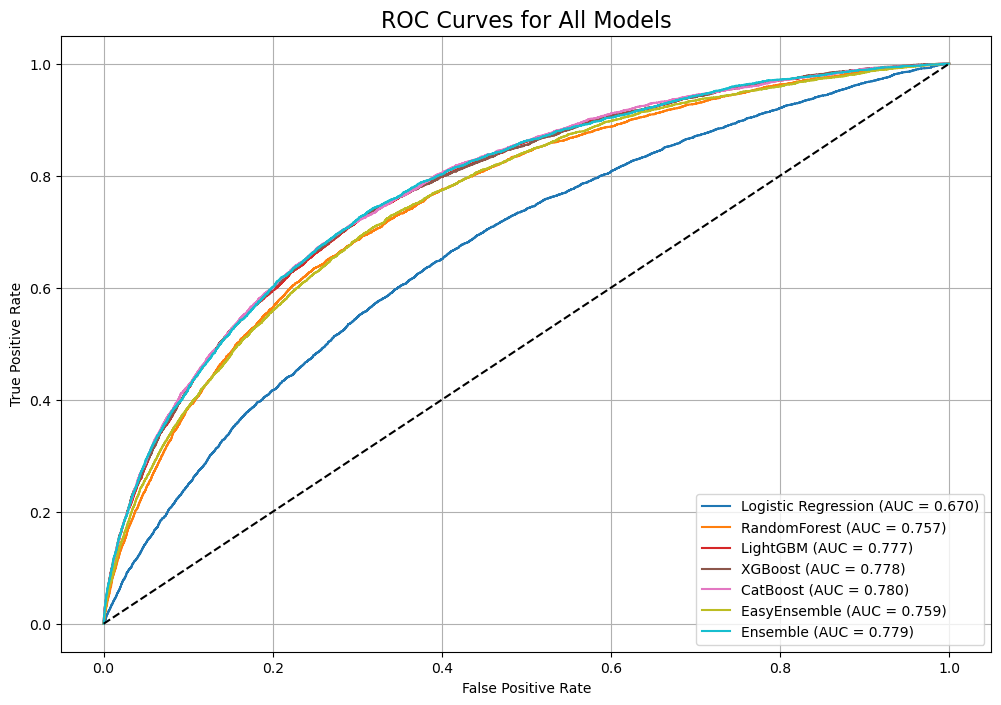

In [127]:
# ROC CURVE
plt.figure(figsize=(12, 8))
for (name, model), color in zip(models.items(), colors):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})", color=color)

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curves for All Models", fontsize=16)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

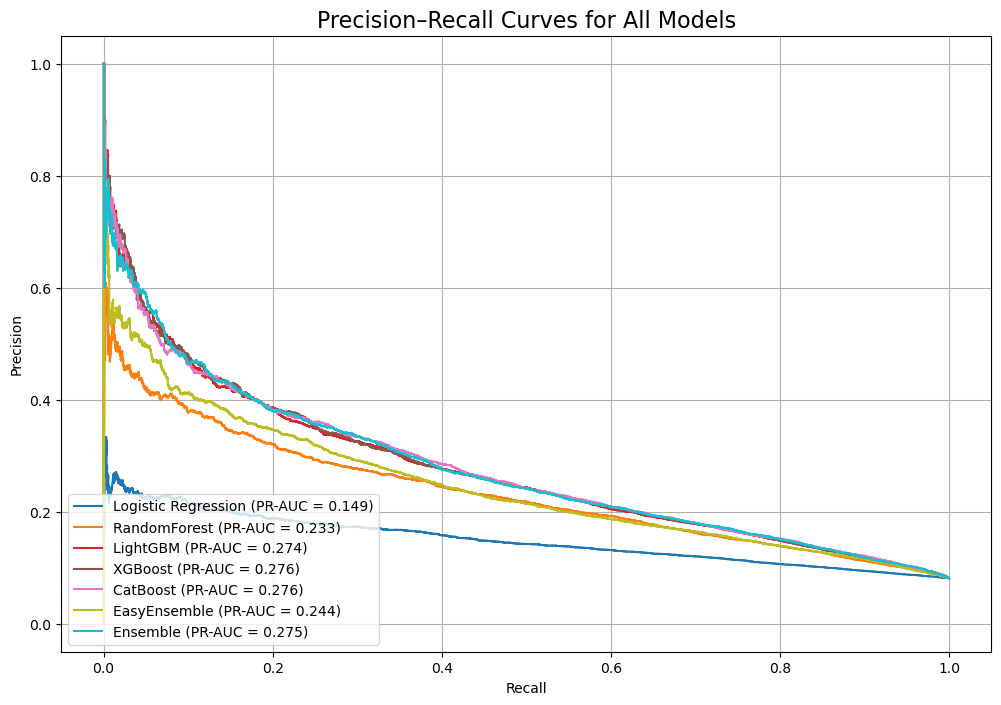

In [128]:
# PRECISION–RECALL CURVE
plt.figure(figsize=(12, 8))
for (name, model), color in zip(models.items(), colors):
    y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{name} (PR-AUC = {pr_auc:.3f})", color=color)

plt.title("Precision–Recall Curves for All Models", fontsize=16)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

Observations
*  **False negatives are extremely costly** in home loans, so the model must prioritize **high recall** for defaulters.
* **XGBoost achieves the highest recall (0.4580)** among all models, detecting the most true defaulters and minimizing credit risk.
* Its F1-score (0.3314) is also among the best, making it strong both statistically and financially.
* **CatBoost is the second-best** with the highest F1, but slightly lower recall, making it better only if you want fewer false alerts.
* Therefore, **XGBoost is the optimal model for deployment**, as it best aligns with the business objective of reducing loan default losses.

### Saving Models

In [131]:
import os
import joblib
import json

SAVE_DIR = "saved_models"
os.makedirs(SAVE_DIR, exist_ok=True)
print("Saving all models to folder:", SAVE_DIR)

all_models = {
    "logistic_regression": log_reg_best,
    "random_forest": rf_best,
    "lightgbm": lgb_best,
    "xgboost": xgb_best,
    "catboost": cat_best,
    "easy_ensemble": eec_best,
    "voting_ensemble": ensemble
}

for name, model in all_models.items():
    filepath = os.path.join(SAVE_DIR, f"{name}.joblib")
    joblib.dump(model, filepath)
    print(f"Saved model: {filepath}")

best_thresholds = {}
for name, res in results.items():
    # Map display names to save-friendly names
    key = name.lower().replace(" ", "_")
    best_thresholds[key] = float(res["best_threshold"])

thresholds_path = os.path.join(SAVE_DIR, "thresholds.json")
with open(thresholds_path, "w") as f:
    json.dump(best_thresholds, f, indent=4)

print("\nSaved thresholds:", best_thresholds)

columns_path = os.path.join(SAVE_DIR, "columns.json")
with open(columns_path, "w") as f:
    json.dump(list(X_train.columns), f)

print("[Saved feature columns.")
print("\nAll files saved successfully!")

Saving all models to folder: saved_models
Saved model: saved_models\logistic_regression.joblib
Saved model: saved_models\random_forest.joblib
Saved model: saved_models\lightgbm.joblib
Saved model: saved_models\xgboost.joblib
Saved model: saved_models\catboost.joblib
Saved model: saved_models\easy_ensemble.joblib
Saved model: saved_models\voting_ensemble.joblib

Saved thresholds: {'logistic_regression': 0.5836731766202166, 'randomforest': 0.18740547991031817, 'lightgbm': 0.6551350682594617, 'xgboost': 0.6348675489425659, 'catboost': 0.6852117375512691, 'easyensemble': 0.5722644673904411, 'ensemble_model': 0.6312588664168882}
[Saved feature columns.

All files saved successfully!


### Load Any Model Later

In [132]:
import joblib
import json

model = joblib.load("saved_models/catboost.joblib")

with open("saved_models/thresholds.json", "r") as f:
    thresholds = json.load(f)

with open("saved_models/columns.json", "r") as f:
    model_columns = json.load(f)

print("Loaded model and metadata successfully")

Loaded model and metadata successfully


### Creating a Final deployment interface script

In [133]:
import joblib
import json
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [134]:
#  Load Model + Threshold + Columns

SAVE_DIR = "saved_models"   # folder created earlier

def load_artifacts(model_name):
    """
    Load model, columns, and thresholds for deployment.
    """
    # Load the model
    model = joblib.load(os.path.join(SAVE_DIR, f"{model_name}.joblib"))

    # Load columns
    with open(os.path.join(SAVE_DIR, "columns.json"), "r") as f:
        model_columns = json.load(f)

    # Load thresholds
    with open(os.path.join(SAVE_DIR, "thresholds.json"), "r") as f:
        thresholds = json.load(f)

    # Lookup threshold for this model
    # model_name must match key in thresholds.json
    threshold = thresholds[model_name]

    print(f"[INFO] Loaded model: {model_name}")
    print(f"[INFO] Loaded threshold: {threshold}")
    print(f"[INFO] Loaded {len(model_columns)} columns.")

    return model, model_columns, threshold

In [135]:
# Column Cleaning — same method used during training

def clean_cols(df):
    df = df.copy()
    df.columns = (
        df.columns
        .str.replace('[^0-9a-zA-Z_]', '_', regex=True)
        .str.replace('__+', '_', regex=True)
        .str.strip('_')
    )
    return df

In [136]:
#  Preprocess Input for Inference

def preprocess_input(df, model_columns):
    """
    Clean column names + align missing columns + correct order.
    """

    df = clean_cols(df.copy())

    # Add missing columns with zeros
    missing_cols = [col for col in model_columns if col not in df.columns]
    for col in missing_cols:
        df[col] = 0

    # Remove unexpected columns
    df = df[model_columns]

    return df

In [137]:
#  Predict Function (Probability + Label)

def predict_default(df, model_name):
    """
    Load model, preprocess input, predict probability & label.
    """
    # Load model + metadata
    model, model_columns, threshold = load_artifacts(model_name)

    # Preprocess incoming data
    df_prep = preprocess_input(df, model_columns)

    # Predict probability
    proba = model.predict_proba(df_prep)[:, 1]

    # Predict label using best threshold
    preds = (proba >= threshold).astype(int)

    # Build output
    output = pd.DataFrame({
        "default_probability": proba,
        "prediction": preds
    })

    return output

In [138]:
# single Row Helper

def predict_single(customer_dict, model_name):
    """
    Accept a dictionary representing one customer.
    """
    df = pd.DataFrame([customer_dict])
    return predict_default(df, model_name)

#### Predict for a single customer

In [144]:
new_customer = {
    "AMT_INCOME_TOTAL": 180000,
    "AMT_CREDIT": 450000,
    "EXT_SOURCE_2": 0.41,
    "DAYS_EMPLOYED": -2000,
    "NAME_FAMILY_STATUS": "Married",
    # ... include other features if available
}

result = predict_single(new_customer, "catboost")   # or "voting_ensemble"
print(result)


[INFO] Loaded model: catboost
[INFO] Loaded threshold: 0.6852117375512691
[INFO] Loaded 240 columns.
   default_probability  prediction
0             0.612848           0
